In [30]:
#First import the main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data_frame= pd.read_csv('new_cleaned_data.csv')
print(data_frame.head())
print(data_frame.columns) 
# Double check whether there is any  missing values
missing_val = data_frame.isnull().sum()

# Display any possible missing values and summary statistics
summary_statistics = data_frame.describe()
print(missing_val)
print(summary_statistics)


# Use one-hot encoding method to convert categorical features to numerical  
data_frame_encoded = pd.get_dummies(data_frame, drop_first=True)

# Define the encoding feature and target
x = data_frame_encoded.drop('Churn_Yes', axis=1)  # Feature
y = data_frame_encoded['Churn_Yes']               # Target

from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into testing and training data, Form a roughly 70-30 split, where around 30% for testing and around 70% of the data will be used for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Display the shape of the resulting datasets
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Create an instance for decision classifier
classifier_Tree = tree.DecisionTreeClassifier()

# Train the decision tree
classifier_Tree.fit(x_train, y_train)

#Predict for the decision tree
DecisionTree_Predicting=classifier_Tree.predict(x_test)

#Import the Random Forest Classifier
from sklearn. ensemble import RandomForestClassifier

#As the cleaned data is smaller, instance is created for Random Forest Classifier
randomForest=RandomForestClassifier(n_estimators=107, random_state = 42)

#fitting my random forest classifier with train dataset
randomForest.fit(x_train, y_train)

#Random Forest Predicting in test dataset
randomForest_Prediction= randomForest.predict(x_test)

#Decision tree results
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,DecisionTree_Predicting))
#Random Forest Result
print(classification_report(y_test,randomForest_Prediction))
# Calculate precision,f1 score, recall etc.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicting= randomForest.predict(x_test)
precision_scr = precision_score(y_test, predicting)
recall_scr = recall_score(y_test, predicting)
f1 = f1_score(y_test, predicting)
print(predicting, precision_scr,f1, recall_scr)
#Perform training and testing data
x_train.head()
y_train.head()
x_test.head()
y_test.head()


#sns.pairplot(data_frame_encoded)

#plt.xlabel(x_train.columns[0])
#plt.ylabel(x_train.columns[1])
#plt.show()
#plt.title('Scatter plot of training set')
#plt.show()


   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      34          Yes            No   
2    Male              0         No       2          Yes            No   
3    Male              0         No      45           No            No   
4  Female              0         No       2          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month           29.85    No  
1             DSL        One year           56.95    No  
2             DSL  Month-to-month           53.85   Yes  
3             DSL        One year           42.30    No  
4     Fiber optic  Month-to-month           70.70   Yes  
Index(['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'Contract', 'MonthlyCharges',
       'Churn'],
      dtype='object')
gender             0


185     1
2715    0
3825    0
1807    1
132     0
Name: Churn_Yes, dtype: uint8

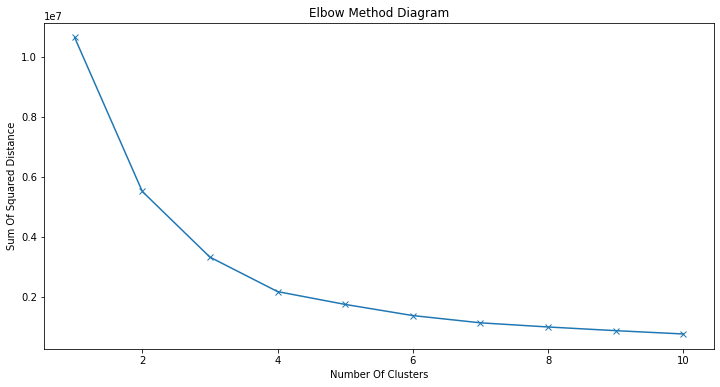

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
def use_elbow_method(data_frame_encoded):
    #Sum of Squared Distance
    sse = []
    #let the number of clusters be in range of 1 to 10
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data_frame_encoded)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 11), sse, marker='x')
    plt.title('Elbow Method Diagram')
    plt.ylabel('Sum Of Squared Distance')
    plt.xlabel('Number Of Clusters')
    plt.show()
    #plt.legend()
use_elbow_method(data_frame_encoded)

#From the graph, we could see the optimal number of clusters would be n=4.

In [32]:
y_train.head()

298     0
3318    1
5586    0
6654    1
5362    0
Name: Churn_Yes, dtype: uint8

In [33]:
x_test.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
185,0,1,24.80,0,0,0,0,0,0,0
2715,0,41,25.25,1,0,1,1,0,0,0
3825,0,52,19.35,0,1,1,0,0,0,1
1807,0,1,76.35,0,0,1,0,1,0,0
132,0,67,50.55,1,0,1,0,0,0,1


In [34]:
y_test.head()

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn_Yes, dtype: uint8

In [35]:
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
298,0,40,74.55,1,1,1,1,0,0,0
3318,0,10,29.50,1,0,0,0,0,0,0
5586,0,27,19.15,0,0,1,0,0,1,0
6654,0,7,86.50,0,0,1,1,1,0,0
5362,0,65,24.75,1,1,1,1,0,0,1


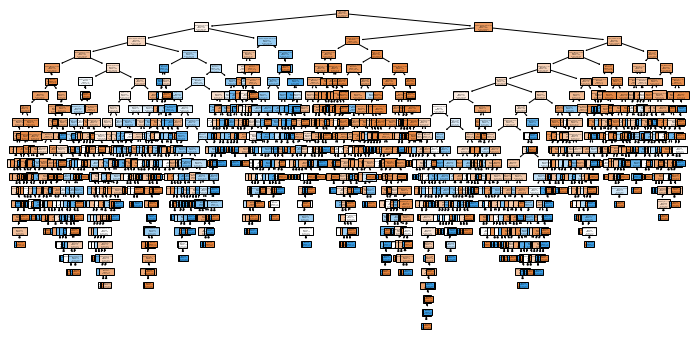

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the original tree using RandomForest 
first_tree = randomForest.estimators_[0]

# Plot the first tree
plt.figure(figsize=(12, 6))
plot_tree(first_tree, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'])
plt.show()